In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 231)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

#shuffle? and batch size?
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(64,128)
        self.output = nn.Linear(128,10)
        self.relu = nn.ReLU()
        #self.sigmoid = nn.Sigmoid()
        #self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1) 
        #dim (int) – A dimension along which Softmax will be computed (so every slice along dim will sum to 1).
        
    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.softmax(self.output(x))   #can use F.softmax instead of self.softmax
        return x
       

        #testing F
        #train_features, train_labels = next(iter(train_loader))

In [4]:
model = MLP() 

lossFn = nn.CrossEntropyLoss()

optimiser = optim.Adam(model.parameters(), lr=0.01) #SGD and Adam

num_epochs = 15

Epoch 1: Loss = 2.160, Accuracy = 32.99%
Epoch 2: Loss = 1.847, Accuracy = 65.69%
Epoch 3: Loss = 1.755, Accuracy = 73.00%
Epoch 4: Loss = 1.631, Accuracy = 87.27%
Epoch 5: Loss = 1.548, Accuracy = 94.08%
Epoch 6: Loss = 1.524, Accuracy = 95.69%
Epoch 7: Loss = 1.504, Accuracy = 97.63%
Epoch 8: Loss = 1.498, Accuracy = 97.63%
Epoch 9: Loss = 1.491, Accuracy = 98.33%
Epoch 10: Loss = 1.489, Accuracy = 98.61%
Epoch 11: Loss = 1.484, Accuracy = 98.75%
Epoch 12: Loss = 1.485, Accuracy = 98.54%
Epoch 13: Loss = 1.479, Accuracy = 98.96%
Epoch 14: Loss = 1.480, Accuracy = 98.82%
Epoch 15: Loss = 1.476, Accuracy = 99.03%


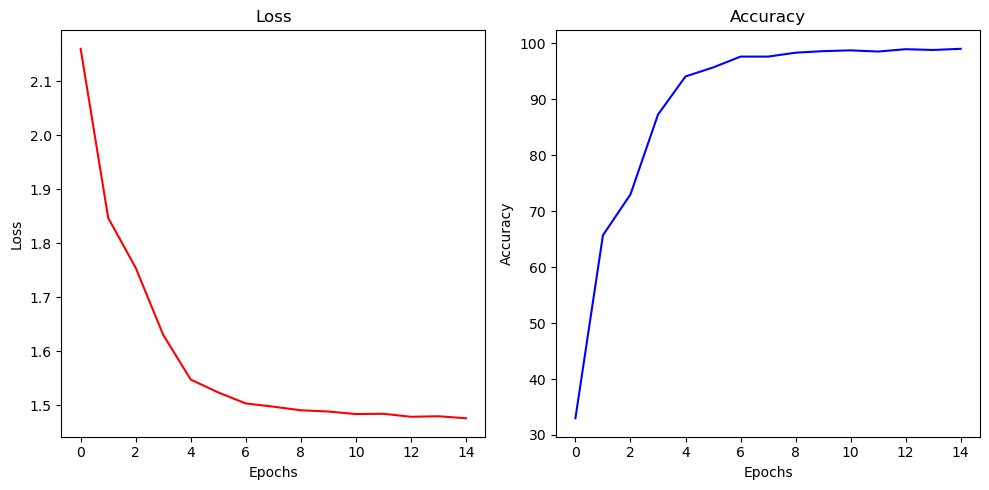

In [5]:
#Training the model
lossHistory = [] 
accuHistory = []
    
for epoch in range(num_epochs):
    
    #model.train()  
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, targets in train_loader:
        optimiser.zero_grad() #Zero the gradients
        outputs = model(inputs) #foward pass
        loss = lossFn(outputs,targets)    #calculate the loss
        loss.backward()   #backward pass         
        optimiser.step()  #update weights
            
        #accumulate loss
        running_loss += loss.item() * inputs.size(0)  #inputs.size(0) returns batch of input data size and helps in scaling 
            
        #calculate accuracy
        predicted = torch.argmax(outputs, dim=1)
        total += targets.size(0) 
        correct += (predicted == targets).sum().item()
        
        
    epoch_loss = running_loss / len(train_loader.dataset) #how many bathces tehre are
    epoch_accuracy = 100 * correct / total
    
    #append to history lists
    lossHistory.append(epoch_loss)
    accuHistory.append(epoch_accuracy)
    
    print(f"Epoch {epoch + 1}: Loss = {epoch_loss:.3f}, Accuracy = {epoch_accuracy:.2f}%")

    
#plotting loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(lossHistory, 'r')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(accuHistory, 'b')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [6]:
#Evaluating the model on the test set
#model.eval()

correct_test = 0
total_test = 0

predicted_labels = []
actual_labels = []


for inputs, targets in test_loader:
    outputs = model(inputs)
    predicted = torch.argmax(outputs, dim=1)
    total_test += targets.size(0)
    correct_test += (predicted == targets).sum().item()

    #store predicted and actual labels for five examples
    if len(predicted_labels) < 5:
        predicted_labels.extend(predicted.tolist())
        actual_labels.extend(targets.tolist())

#calculate test accuracy
test_accuracy = 100 * correct_test / total_test

print(f"Test Accuracy: {test_accuracy:.2f}%")

print("")
for i in range(5):
    print(f"Test Image {i + 1}: Predicted Label= {predicted_labels[i]}, Actual Label= {actual_labels[i]}")




Test Accuracy: 95.83%

Test Image 1: Predicted Label= 4, Actual Label= 4
Test Image 2: Predicted Label= 5, Actual Label= 5
Test Image 3: Predicted Label= 1, Actual Label= 1
Test Image 4: Predicted Label= 4, Actual Label= 4
Test Image 5: Predicted Label= 1, Actual Label= 1
